In [1]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

Reading graph edges and nodes:

In [2]:
with open('../csv_files/metro_edges_no_duplicated_edges_no_cycles_networkx.csv') as f:
    f.readline()        
    g = nx.parse_edgelist(f, delimiter=',', nodetype=int, data=(('Weight', float), ('edge_name', str), ('edge_color', str), ('travel_seconds', float) ), create_using = nx.MultiGraph())
    
with open('../csv_files/metro_gephi_nodes_coordinates.csv') as f:
    reader = csv.DictReader(f)

    node_latitudes = {}
    node_longitudes = {}
    node_names = {}
    
    for row in reader:
        node_latitudes[ int(row['Id']) ] = float(row['latitude'])
        node_longitudes[ int(row['Id']) ] = float(row['longitude'])
        node_names[ int(row['Id']) ] = row['Label']
        
nx.set_node_attributes(g, name = 'latitude', values = node_latitudes)
nx.set_node_attributes(g, name = 'longitude', values = node_longitudes)
nx.set_node_attributes(g, name = 'name', values = node_names)

In [3]:
def top_n_stations_by_attribute(graph, attr_name, n, ascending = False):
    return pd.DataFrame.from_records(map(lambda x: x[1],  list(graph.nodes(data=True)) ))[['name', attr_name]].sort_values(attr_name, ascending = ascending)[:(n+1)].reset_index(drop=True).shift()[1:]

Top 35 stations with more neighbour stations 

In [4]:
nx.set_node_attributes(g, name = 'degree', values = dict(g.degree))

stations_and_their_neighbours = top_n_stations_by_attribute(g, 'degree', len(g.edges()))

stations_and_their_neighbours[:35]

,name,degree
1,AVENIDA DE AMERICA,8.0
2,PLAZA DE CASTILLA,6.0
3,ALONSO MARTINEZ,6.0
4,SOL,6.0
5,DIEGO DE LEON,6.0
6,OPERA,5.0
7,PRINCIPE PIO,5.0
8,ARGÜELLES,5.0
9,NUEVOS MINISTERIOS,5.0
10,CUATRO CAMINOS,5.0


Neighbours' count histogram

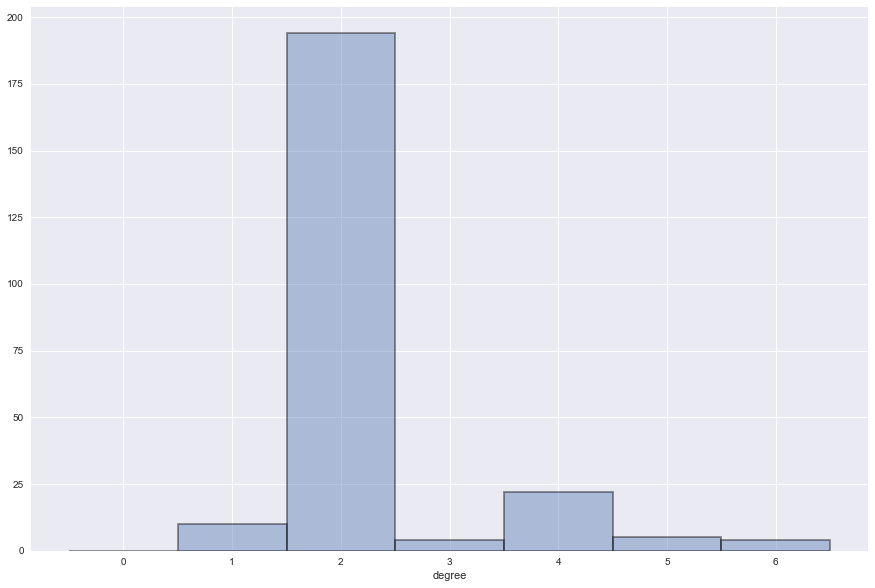

In [5]:
sns.plt.figure(figsize=(15, 10))
sns.distplot(stations_and_their_neighbours['degree'], kde=False, rug=False, bins = np.arange(8)-0.5, hist_kws=dict(edgecolor='k', linewidth=2))
sns.plt.show()

In [6]:
stations_and_their_neighbours.groupby('degree').count().rename(columns={'name': 'count'})

,count
degree,
1.0,10
2.0,194
3.0,4
4.0,22
5.0,5
6.0,4
8.0,1


Most of the stations are connected to two other stations. 

There are 10 Metro stations which are connected to only 1 stations: these stations are the most vulnerable because they strongly depend on other stations to remain connected to the Madrid Metro network.

Calculating stations importance using Closeness Centrality: This metric indicates how long it will take for information (people) from a node (station) "u" will take to reach other nodes (stations) in the network. We can determine which is the closest node (station) to any other node (station) in the network.

In [7]:
nx.set_node_attributes(g, name = 'closeness_centrality', values = nx.closeness_centrality(g, distance = 'travel_seconds'))

Top 20 most important (according to Closeness Centrality algorithm) Metro stations are shown

In [8]:
top_n_stations_by_attribute(g, 'closeness_centrality', 20)

,name,closeness_centrality
1,GREGORIO MARAÑON,0.000384
2,ALONSO MARTINEZ,0.000383
3,TRIBUNAL,0.000376
4,AVENIDA DE AMERICA,0.000374
5,PLAZA DE ESPAÑA,0.000369
6,NUÑEZ DE BALBOA,0.000367
7,NUEVOS MINISTERIOS,0.000367
8,RUBEN DARIO,0.000366
9,BILBAO,0.000365
10,DIEGO DE LEON,0.000364


Another metric to have in mind: Betweenness Centrality. This metric indicates how often a node (station) is found on a shortest path between two nodes (stations) in the network.

In [9]:
nx.set_node_attributes(g, name = 'betweenness_centrality', values = nx.betweenness_centrality(g, normalized = True, weight = 'Weight'))

Top 20 most important (according to Betweenness Centrality algorithm) Metro stations are shown

In [10]:
top_n_stations_by_attribute(g, 'betweenness_centrality', 20)

,name,betweenness_centrality
1,GREGORIO MARAÑON,0.321421
2,PRINCIPE PIO,0.311290
3,NUEVOS MINISTERIOS,0.305922
4,ALONSO MARTINEZ,0.296078
5,AVENIDA DE AMERICA,0.281850
6,CASA DE CAMPO,0.255851
7,LAGO,0.246326
8,BATAN,0.240864
9,TRIBUNAL,0.230387
10,COLONIA JARDIN,0.225907


It seems Gregorio Marañón is quite important again, and thanks to the Betweenness Centrality we can say Gregorio Marañón is the Metro station that controls the most the Metro network because more information (people) can pass through it than on any other node (station).

Now let's calculate the articulation points: a node (Metro Station) is an articulation point if the graph gets disconnected (some Metro Stations will stop being connected somehow to other Metro Stations) by removing that node (station).

In [11]:
dict_nodes = g.node_dict_factory(g.nodes)

In [12]:
articulation_stations = list(nx.articulation_points(nx.Graph(g)))

print('%i articulation stations out of %i stations (%0.3f %%) \n' % (len(articulation_stations), len(dict_nodes.keys()), (len(articulation_stations) * 100)/len(dict_nodes.keys()) ) )
aux_list = []
for i in articulation_stations:
    aux_list.append(dict_nodes[i]['name'])
    
aux_list.sort()
aux_list

96 articulation stations out of 241 stations (39.834 %) 



['ABRANTES',
 'AEROPUERTO T1 T2 T3',
 'ALMENDRALES',
 'ALSACIA',
 'ALTO DEL ARENAL',
 'ANTONIO MACHADO',
 'ARTILLEROS',
 'ASCAO',
 'AVDA. DE LA ILUSTRACION',
 'AVENIDA DE GUADALAJARA',
 'AVIACION ESPAÑOLA',
 'BARAJAS',
 'BARRIO DEL PILAR',
 'BARRIO DEL PUERTO',
 'BAUNATAL',
 'BEGOÑA',
 'BUENOS AIRES',
 'CANILLEJAS',
 'CARABANCHEL ALTO',
 'CASA DE CAMPO',
 'CHAMARTIN',
 'CIUDAD DE LOS ANGELES',
 'CIUDAD LINEAL',
 'COLONIA JARDIN',
 'CONGOSTO',
 'COSLADA CENTRAL',
 'CUATRO VIENTOS',
 'EL CAPRICHO',
 'ESTADIO METROPOLITANO',
 'ESTRELLA',
 'FERIA DE MADRID',
 'FRANCOS RODRIGUEZ',
 'FUENCARRAL',
 'GARCIA NOBLEJAS',
 'GUZMAN EL BUENO',
 'HENARES',
 'HERRERA ORIA',
 'HOSPITAL 12 DE OCTUBRE',
 'JARAMA',
 'JOAQUIN VILUMBRALES',
 'LA ALMUDENA',
 'LA ELIPA',
 'LA GAVIA',
 'LA GRANJA',
 'LA MORALEJA',
 'LA PESETA',
 'LA POVEDA',
 'LA RAMBLA',
 'LACOMA',
 'LAS MUSAS',
 'LAS SUERTES',
 'LAS TABLAS',
 'LEGAZPI',
 'MANUEL DE FALLA',
 'MAR DE CRISTAL',
 'MARQUES DE LA VALDAVIA',
 'MIGUEL HERNANDEZ',
 '

As you can see that was a long list. However, there are Metro Stations which are more critical than others. For example, if Puerta del Sur would stop working, none of the Metro Sur (Line 12) stations could reach any Madrid Metro Station because Puerta del Sur is the only one station that connects the Line 12 with the rest of the Metro network.

So in order to know which articulation stations are the most critical, I'm gonna count the number of connected components (the sets of connected Metro Stations) and the number of nodes (stations) each component has.